In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/DataSet"

Mounted at /content/drive


In [2]:
import os
path = "drive/MyDrive/HuanData"
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skewnorm

## Read Data

In [3]:
data_model_county = pd.read_csv(path + "/Quack Quack/model_county_SE.csv")
data_model_county['fips']=data_model_county['fips'].str.replace('"','')
data_model_county['fips_02'] = data_model_county['fips'].astype(str).str[:2]

col_to_move = data_model_county.pop('fips_02')
data_model_county.insert(0, 'fips_02', col_to_move)
data_model_county.head(10)

,fips_02,fips,Fall,Spring,Summer,Winter,Annual,CTYNAME,STNAME
0,01,01001,-0.248564,-0.073735,-0.307132,0.270039,-0.079968,Autauga,Alabama
1,01,01003,0.049693,0.060035,-0.007407,0.444586,0.142995,Baldwin,Alabama
2,01,01005,0.179485,0.127492,-0.061220,0.891132,0.300250,Barbour,Alabama
3,01,01007,-0.398166,-0.210074,-0.576085,0.530794,-0.152667,Bibb,Alabama
4,01,01009,0.308868,0.333460,0.169764,0.735788,0.385534,Blount,Alabama
5,01,01011,0.085601,0.105411,0.001157,0.797291,0.264483,Bullock,Alabama
6,01,01013,-0.593425,-0.536593,-0.493319,-0.106469,-0.426963,Butler,Alabama
7,01,01015,0.047379,0.053460,-0.191266,0.956388,0.217319,Calhoun,Alabama
8,01,01017,-0.139005,0.004360,0.037220,0.974702,0.228638,Chambers,Alabama
9,01,01019,-0.185735,-0.012063,-0.495675,0.891739,0.050818,Cherokee,Alabama


In [4]:
data_model_county.dtypes

,0
fips_02,object
fips,object
Fall,float64
Spring,float64
Summer,float64
Winter,float64
Annual,float64
CTYNAME,object
STNAME,object


In [5]:
data_model_county.describe()

,Fall,Spring,Summer,Winter,Annual
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,0.541821,0.827684,0.455960,1.414876,0.814849
std,0.535915,0.535592,0.617761,0.713292,0.547305
min,-0.845813,-0.609171,-0.943591,-0.197573,-0.566222
25%,0.152684,0.435069,-0.007203,0.951570,0.400704
50%,0.497030,0.831619,0.344198,1.322314,0.743877
75%,0.899379,1.213799,0.870907,1.802970,1.204774
max,2.526660,2.786215,2.583295,3.736705,2.537160


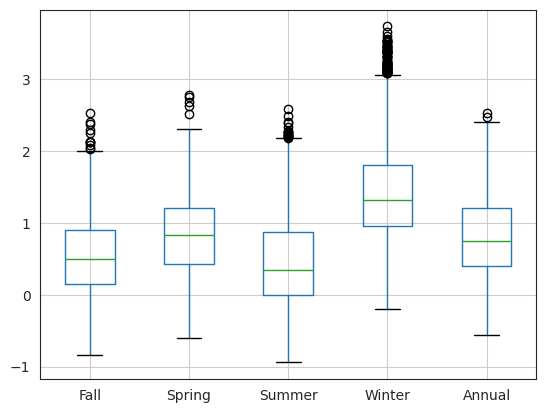

In [6]:
# Candle Stick Chart for Model County
sns.set_style("white")
plt.figure()
data_model_county.boxplot(column=["Fall", "Spring", "Summer", "Winter", "Annual"])
plt.show()

In [7]:
#Listing counties by state
counties_by_state = data_model_county.groupby('STNAME')['CTYNAME'].unique()
print("Counties by State:")
print(counties_by_state)
print('\n')

Counties by State:
STNAME
Alabama                 [Autauga , Baldwin , Barbour , Bibb , Blount ,...
Arizona                 [Apache , Cochise , Coconino , Gila , Graham ,...
Arkansas                [Arkansas , Ashley , Baxter , Benton , Boone ,...
California              [Alameda , Alpine , Amador , Butte , Calaveras...
Colorado                [Adams , Alamosa , Arapahoe , Archuleta , Baca...
Connecticut             [Fairfield , Hartford , Litchfield , Middlesex...
Delaware                                    [Kent , New Castle , Sussex ]
District of Columbia                               [District of Columbia]
Florida                 [Alachua , Baker , Bay , Bradford , Brevard , ...
Georgia                 [Appling , Atkinson , Bacon , Baker , Baldwin ...
Idaho                   [Ada , Adams , Bannock , Bear Lake , Benewah ,...
Illinois                [Adams , Alexander , Bond , Boone , Brown , Bu...
Indiana                 [Adams , Allen , Bartholomew , Benton , Blackf...
Iowa        

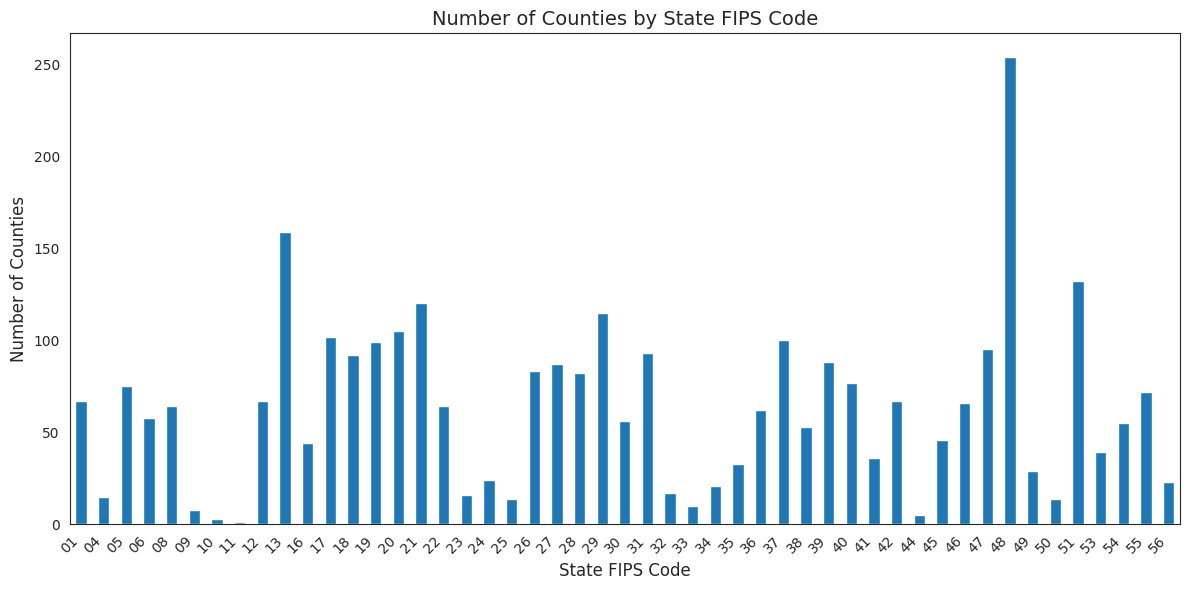

In [8]:
# Adjust figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart
fips_02_counts = data_model_county.groupby('fips_02')['fips'].nunique().plot(kind='bar')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add axis labels and title
plt.xlabel('State FIPS Code', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.title('Number of Counties by State FIPS Code', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


In [9]:
# Reorder columns
new_order = ['fips_02',	'fips',	'Spring',	'Summer','Fall',	'Winter',	'Annual',	'CTYNAME',	'STNAME']
data_model_county = data_model_county.reindex(columns=new_order)

data_model_county = data_model_county.set_index('STNAME')
data_model_county.head()

,fips_02,fips,Spring,Summer,Fall,Winter,Annual,CTYNAME
STNAME,,,,,,,,
Alabama,01,01001,-0.073735,-0.307132,-0.248564,0.270039,-0.079968,Autauga
Alabama,01,01003,0.060035,-0.007407,0.049693,0.444586,0.142995,Baldwin
Alabama,01,01005,0.127492,-0.061220,0.179485,0.891132,0.300250,Barbour
Alabama,01,01007,-0.210074,-0.576085,-0.398166,0.530794,-0.152667,Bibb
Alabama,01,01009,0.333460,0.169764,0.308868,0.735788,0.385534,Blount


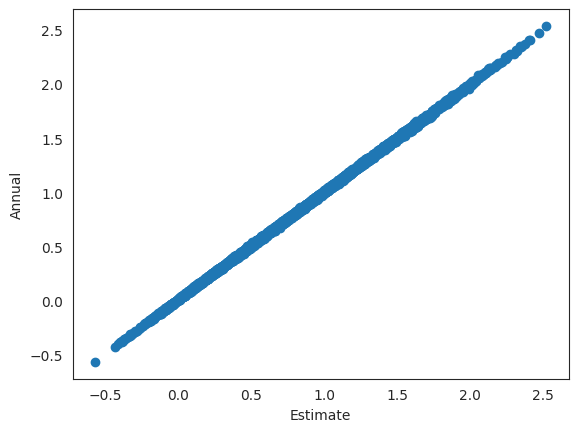

In [10]:
data_model_county["estimate"] = (data_model_county["Fall"] + data_model_county["Spring"] + data_model_county["Summer"] + data_model_county["Winter"]) / 4
plt.scatter(data_model_county["estimate"], data_model_county["Annual"])
plt.xlabel("Estimate")
plt.ylabel("Annual")
plt.show()

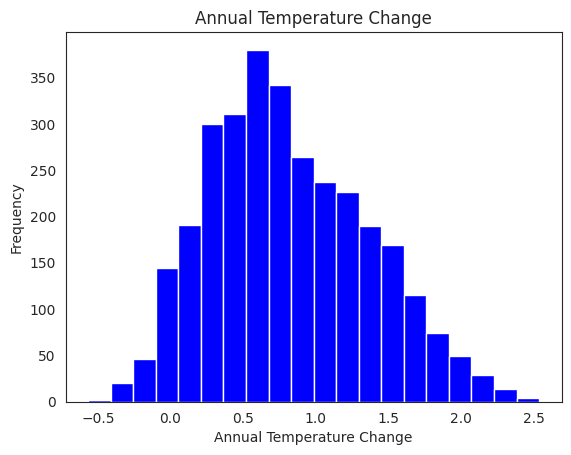

In [11]:
# Frequency of annual temperature change of counties
plt.hist(data_model_county['Annual'], bins=20, color='blue')
plt.xlabel("Annual Temperature Change")
plt.ylabel("Frequency")
plt.title("Annual Temperature Change")
plt.show()

In [12]:
data_model_state = pd.read_csv(path + "/Quack Quack/model_state.csv")

In [13]:
col_to_move = data_model_state.pop('max_warming_season')
col_to_move = data_model_state.pop('STUSAB')
col_to_move = data_model_state.pop('STATENS')

col_to_move = data_model_state.pop('STATE_NAME')
data_model_state.insert(0, 'STATE_NAME', col_to_move)

In [14]:
# Convert 'fips' to object and add leading zero if necessary
data_model_state['fips'] = data_model_state['fips'].astype(str).apply(lambda x: f"0{x}" if len(x) == 1 else x)

print(data_model_state)

        STATE_NAME fips      Fall    Spring    Summer    Winter    Annual
0          Alabama   01 -0.195668 -0.105862 -0.325009  0.458526 -0.035048
1          Arizona   04  1.203951  1.384480  1.274455  1.388388  1.319880
2         Arkansas   05 -0.042540  0.266399  0.058596  0.532247  0.214074
3       California   06  1.570921  1.449242  1.478335  1.412430  1.480561
4         Colorado   08  1.055309  1.436910  1.367845  1.838758  1.438589
5      Connecticut   09  1.453093  1.543407  1.580628  2.633975  1.801492
6         Delaware   10  1.378949  1.537848  1.522878  2.201002  1.661683
7          Florida   12  1.076586  0.860797  0.914455  1.300233  1.034878
8          Georgia   13  0.251217  0.174462 -0.016056  1.109362  0.384049
9            Idaho   16  0.686631  1.004868  1.072720  1.409905  1.046917
10        Illinois   17  0.557305  1.153298  0.217481  1.308741  0.814420
11         Indiana   18  0.500966  1.044840  0.018074  1.280564  0.712610
12            Iowa   19  0.363979  0.7

In [15]:
data_model_state.fips.unique()

array(['01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51',
       '53', '54', '55', '56'], dtype=object)

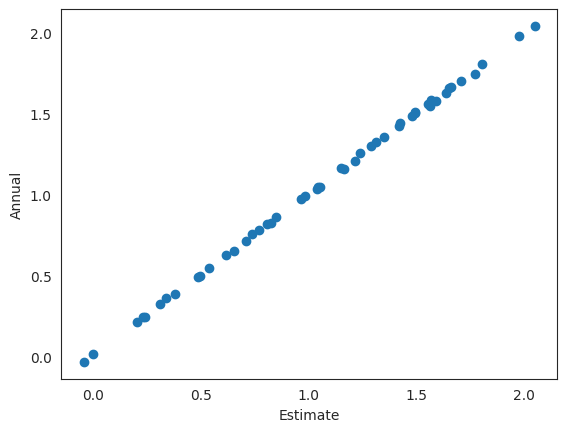

In [16]:
data_model_state["estimate"] = (data_model_state["Fall"] + data_model_state["Spring"] + data_model_state["Summer"] + data_model_state["Winter"]) / 4
plt.scatter(data_model_state["estimate"], data_model_state["Annual"])
plt.xlabel("Estimate")
plt.ylabel("Annual")
plt.show()

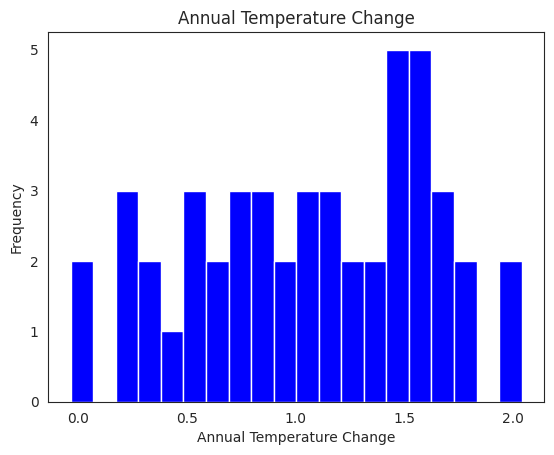

In [17]:
# Frequency of annual temperature change of states
plt.hist(data_model_state['Annual'], bins=20, color='blue')
plt.xlabel("Annual Temperature Change")
plt.ylabel("Frequency")
plt.title("Annual Temperature Change")
plt.show()

In [18]:
data_model_state.describe()

,Fall,Spring,Summer,Winter,Annual,estimate
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.785324,1.004280,0.773815,1.668654,1.060972,1.058018
std,0.523901,0.480059,0.630515,0.713727,0.545513,0.549325
min,-0.195668,-0.105862,-0.325009,0.339203,-0.035048,-0.042004
25%,0.361859,0.724370,0.212762,1.191115,0.641008,0.643609
50%,0.769284,1.074631,0.866977,1.507633,1.102286,1.099949
75%,1.163273,1.358113,1.280039,2.274480,1.518205,1.508856
max,1.655732,1.759266,2.114864,3.145933,2.038868,2.047933


In [19]:
data_model_county

,fips_02,fips,Spring,Summer,Fall,Winter,Annual,CTYNAME,estimate
STNAME,,,,,,,,,
Alabama,01,01001,-0.073735,-0.307132,-0.248564,0.270039,-0.079968,Autauga,-0.089848
Alabama,01,01003,0.060035,-0.007407,0.049693,0.444586,0.142995,Baldwin,0.136727
Alabama,01,01005,0.127492,-0.061220,0.179485,0.891132,0.300250,Barbour,0.284222
Alabama,01,01007,-0.210074,-0.576085,-0.398166,0.530794,-0.152667,Bibb,-0.163383
Alabama,01,01009,0.333460,0.169764,0.308868,0.735788,0.385534,Blount,0.386970
...,...,...,...,...,...,...,...,...,...
Wyoming,56,56037,1.709785,1.424254,1.237333,2.144437,1.660667,Sweetwater,1.628952
Wyoming,56,56039,1.183083,0.692148,0.265877,1.308981,0.874765,Teton,0.862522
Wyoming,56,56041,1.351661,1.272762,1.056832,1.376028,1.292878,Uinta,1.264321


In [20]:
# state = '01'
# state_averages = data_model_county[data_model_county['fips_02'] == state]
# state_data = data_model_state[data_model_state['fips'] == state]

# seasons = ['Spring', 'Summer', 'Fall', 'Winter', 'Annual']
# def calculated_state(state_averages, seasons):

#   county_averages = state_data.groupby('fips')[seasons].mean()
#   calculated_state = county_averages.sum(axis=0) / len(county_averages)
#   return calculated_state

# print (calculated_state)

In [21]:
def calculate_error(state):
  # State data is actual data <- import data from data state
  state_data = data_model_state[data_model_state['fips'] == state]

  # County data used for approximating the state data <-import data from data county
  state_county_data = data_model_county[data_model_county['fips_02'] == state]

  # Calculate the average county
  seasons = ['Spring', 'Summer', 'Fall', 'Winter', 'Annual']
  calculated_average_counties = state_county_data[seasons].mean()

  mse = np.mean((calculated_average_counties - state_data) ** 2)
  rmse = np.sqrt(mse)
  return (state, mse, rmse)

In [22]:
state = '10'
print (calculate_error(state))

('10', 0.0005294488892267411, 0.023009756392164196)


In [23]:
mylist = []
for x in data_model_county['fips_02'].unique():
    values = calculate_error(x)
    mylist.append(values)

print(mylist)

[('01', 0.00014272153337034377, 0.011946611794577731), ('04', 0.0010327330892201344, 0.032136164818162956), ('05', 9.255015337031284e-06, 0.003042205669745437), ('06', 0.027090472654611043, 0.1645918365369651), ('08', 0.0071138976918990555, 0.08434392504442187), ('09', 5.6145129721611794e-05, 0.007493005386466221), ('10', 0.0005294488892267411, 0.023009756392164196), ('11', nan, nan), ('12', 0.009095596480214112, 0.09537083663371163), ('13', 0.0019239951380843868, 0.043863368977820054), ('16', 0.0007658636922739088, 0.027674242397469687), ('17', 0.002160497104919097, 0.04648114784425076), ('18', 0.00015562909732081524, 0.01247513917039867), ('19', 7.177223978658154e-05, 0.008471849844430763), ('20', 0.0003493827434182045, 0.018691782777953646), ('21', 0.0013640381555323172, 0.03693288718110618), ('22', 5.1321987667466115e-05, 0.007163936604093179), ('23', 0.003841607071728731, 0.06198069918715608), ('24', 0.0010249844070356776, 0.03201537766504836), ('25', 0.008633827782676523, 0.09291

In [24]:
df = pd.DataFrame(mylist, columns=['fips', 'mse', 'rmse'])
df = df.dropna()
print(df)

   fips       mse      rmse
0    01  0.000143  0.011947
1    04  0.001033  0.032136
2    05  0.000009  0.003042
3    06  0.027090  0.164592
4    08  0.007114  0.084344
5    09  0.000056  0.007493
6    10  0.000529  0.023010
8    12  0.009096  0.095371
9    13  0.001924  0.043863
10   16  0.000766  0.027674
11   17  0.002160  0.046481
12   18  0.000156  0.012475
13   19  0.000072  0.008472
14   20  0.000349  0.018692
15   21  0.001364  0.036933
16   22  0.000051  0.007164
17   23  0.003842  0.061981
18   24  0.001025  0.032015
19   25  0.008634  0.092918
20   26  0.000529  0.023001
21   27  0.027911  0.167067
22   28  0.000036  0.005996
23   29  0.000221  0.014861
24   30  0.000469  0.021665
25   31  0.004587  0.067729
26   32  0.002447  0.049466
27   33  0.002955  0.054361
28   34  0.000285  0.016893
29   35  0.000150  0.012234
30   36  0.001606  0.040079
31   37  0.000085  0.009236
32   38  0.000501  0.022373
33   39  0.000005  0.002288
34   40  0.001346  0.036688
35   41  0.040300  0

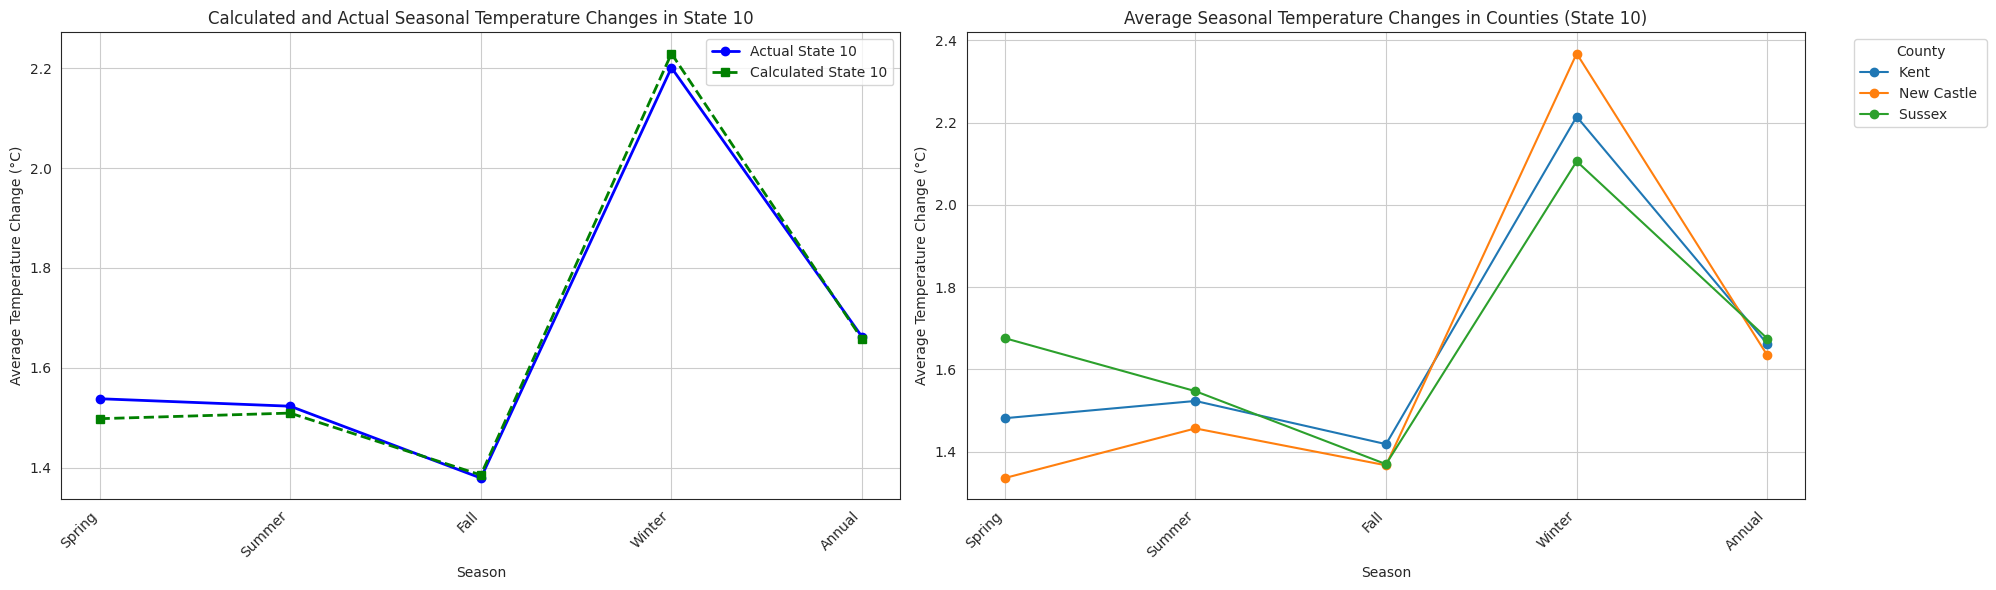

In [25]:
state = '10'
state_data = data_model_state[data_model_state['fips'] == state]
state_averages = data_model_county[data_model_county['fips_02'] == state]
seasons = ['Spring', 'Summer', 'Fall', 'Winter', 'Annual']
calculated_state = state_averages[seasons].mean()

# Prepare county data with one-line code for efficiency
county_data = pd.pivot_table(
    data_model_county[data_model_county['fips_02'] == state],
    values=seasons,
    index='fips',
    aggfunc='mean',
).reset_index(drop=False)  # Keep 'fips' for county names

county_data = pd.merge(county_data, data_model_county[['fips', 'CTYNAME']], on='fips', how='left')
county_names = county_data.set_index('fips')['CTYNAME'].to_dict()

# Create the figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot state temperature changes (ax1)
state_temp_values = state_data[seasons].values[0]
ax1.plot(seasons, state_temp_values, marker='o', linestyle='-', linewidth=2, color='b', label=f'Actual State {state}')
ax1.plot(seasons, calculated_state.values, marker='s', linestyle='--', linewidth=2, color='g', label=f'Calculated State {state}')

ax1.set_xlabel('Season')
ax1.set_ylabel('Average Temperature Change (°C)')
ax1.set_title(f'Calculated and Actual Seasonal Temperature Changes in State {state}')
ax1.set_xticks(range(len(seasons)))
ax1.set_xticklabels(seasons, rotation=45, ha='right')
ax1.grid(True)
ax1.legend()

# Plot county temperature changes (ax2)
for fips_code, row in county_data.iterrows():
    ax2.plot(seasons, row[seasons].values, marker='o', linestyle='-', linewidth=1.5, label=county_names[row['fips']])

ax2.set_xlabel('Season')
ax2.set_ylabel('Average Temperature Change (°C)')
ax2.set_title(f'Average Seasonal Temperature Changes in Counties (State {state})')
ax2.set_xticks(range(len(seasons)))
ax2.set_xticklabels(seasons, rotation=45, ha='right')
ax2.grid(True)

# Customize the legend for subplot 2
ax2.legend(title='County', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

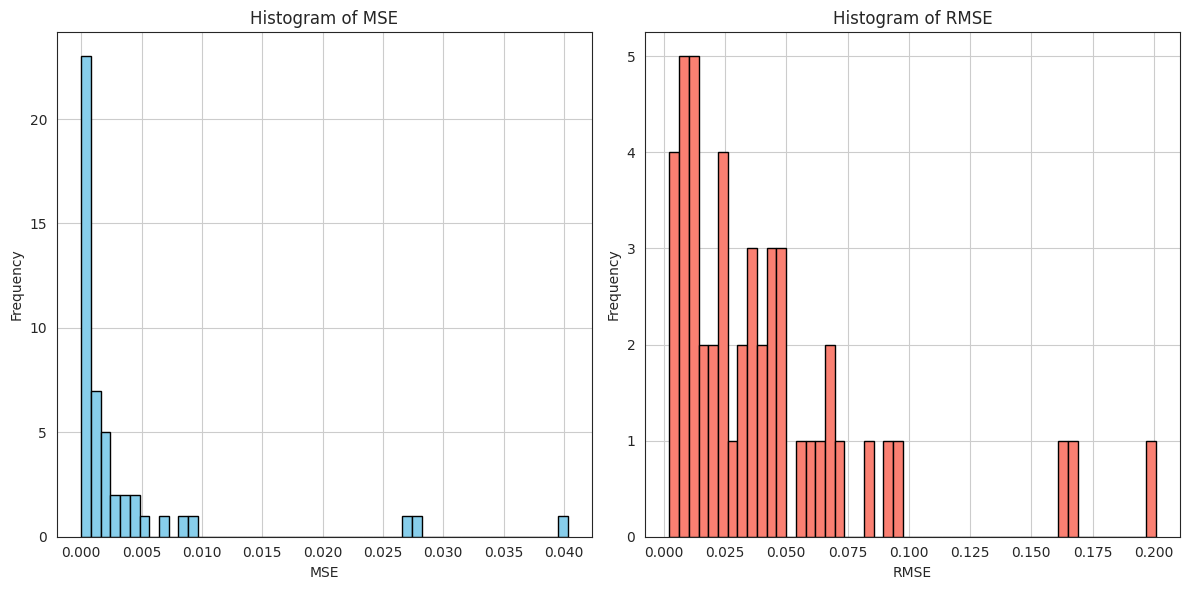

In [26]:
# Create subplots for MSE and RMSE histograms
fig, (ax_mse, ax_rmse) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for MSE
ax_mse.hist(df['mse'], bins=50, color='skyblue', edgecolor='black')
ax_mse.set_title('Histogram of MSE')
ax_mse.set_xlabel('MSE')
ax_mse.set_ylabel('Frequency')
ax_mse.grid(True)

# Plot the histogram for RMSE
ax_rmse.hist(df['rmse'], bins=50, color='salmon', edgecolor='black')
ax_rmse.set_title('Histogram of RMSE')
ax_rmse.set_xlabel('RMSE')
ax_rmse.set_ylabel('Frequency')
ax_rmse.grid(True)

plt.tight_layout()
plt.show()

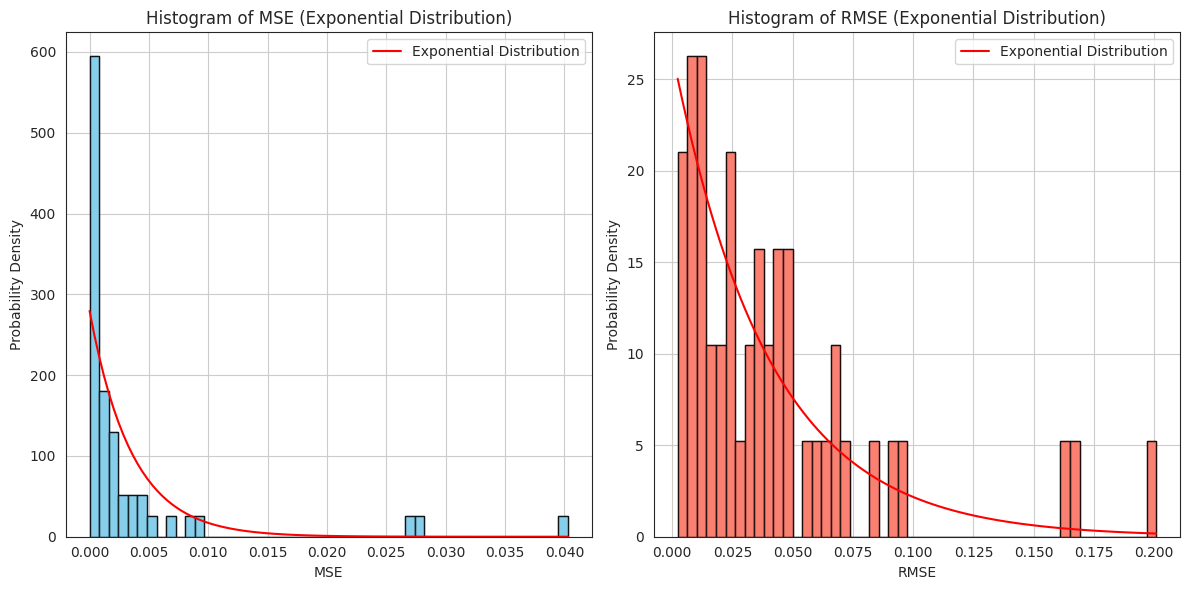

In [27]:
from scipy.stats import expon
# Create subplots for MSE and RMSE histograms
fig, (ax_mse, ax_rmse) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for MSE
ax_mse.hist(df['mse'], bins=50, color='skyblue', edgecolor='black', density=True)  # Normalize for PDF
counts, bins, patches = ax_mse.hist(df['mse'], bins=50, color='skyblue', edgecolor='black', alpha=0.3, density=True)  # Get data for fitting

# Fit an exponential distribution to MSE data
params = expon.fit(df['mse'])
x_fit = np.linspace(min(bins), max(bins), 100)
pdf = expon.pdf(x_fit, *params)  # Generate PDF values for the fitted distribution

# Plot the fitted exponential distribution
ax_mse.plot(x_fit, pdf, 'r-', label='Exponential Distribution')
ax_mse.set_title('Histogram of MSE (Exponential Distribution)')
ax_mse.set_xlabel('MSE')
ax_mse.set_ylabel('Probability Density')
ax_mse.grid(True)
ax_mse.legend()  # Add legend for fitted distribution

# Repeat for RMSE
ax_rmse.hist(df['rmse'], bins=50, color='salmon', edgecolor='black', density=True)
counts, bins, patches = ax_rmse.hist(df['rmse'], bins=50, color='salmon', edgecolor='black', alpha=0.3, density=True)

params = expon.fit(df['rmse'])
x_fit = np.linspace(min(bins), max(bins), 100)
pdf = expon.pdf(x_fit, *params)

ax_rmse.plot(x_fit, pdf, 'r-', label='Exponential Distribution')
ax_rmse.set_title('Histogram of RMSE (Exponential Distribution)')
ax_rmse.set_xlabel('RMSE')
ax_rmse.set_ylabel('Probability Density')
ax_rmse.grid(True)
ax_rmse.legend()  # Add legend for fitted distribution

plt.tight_layout()
plt.show()

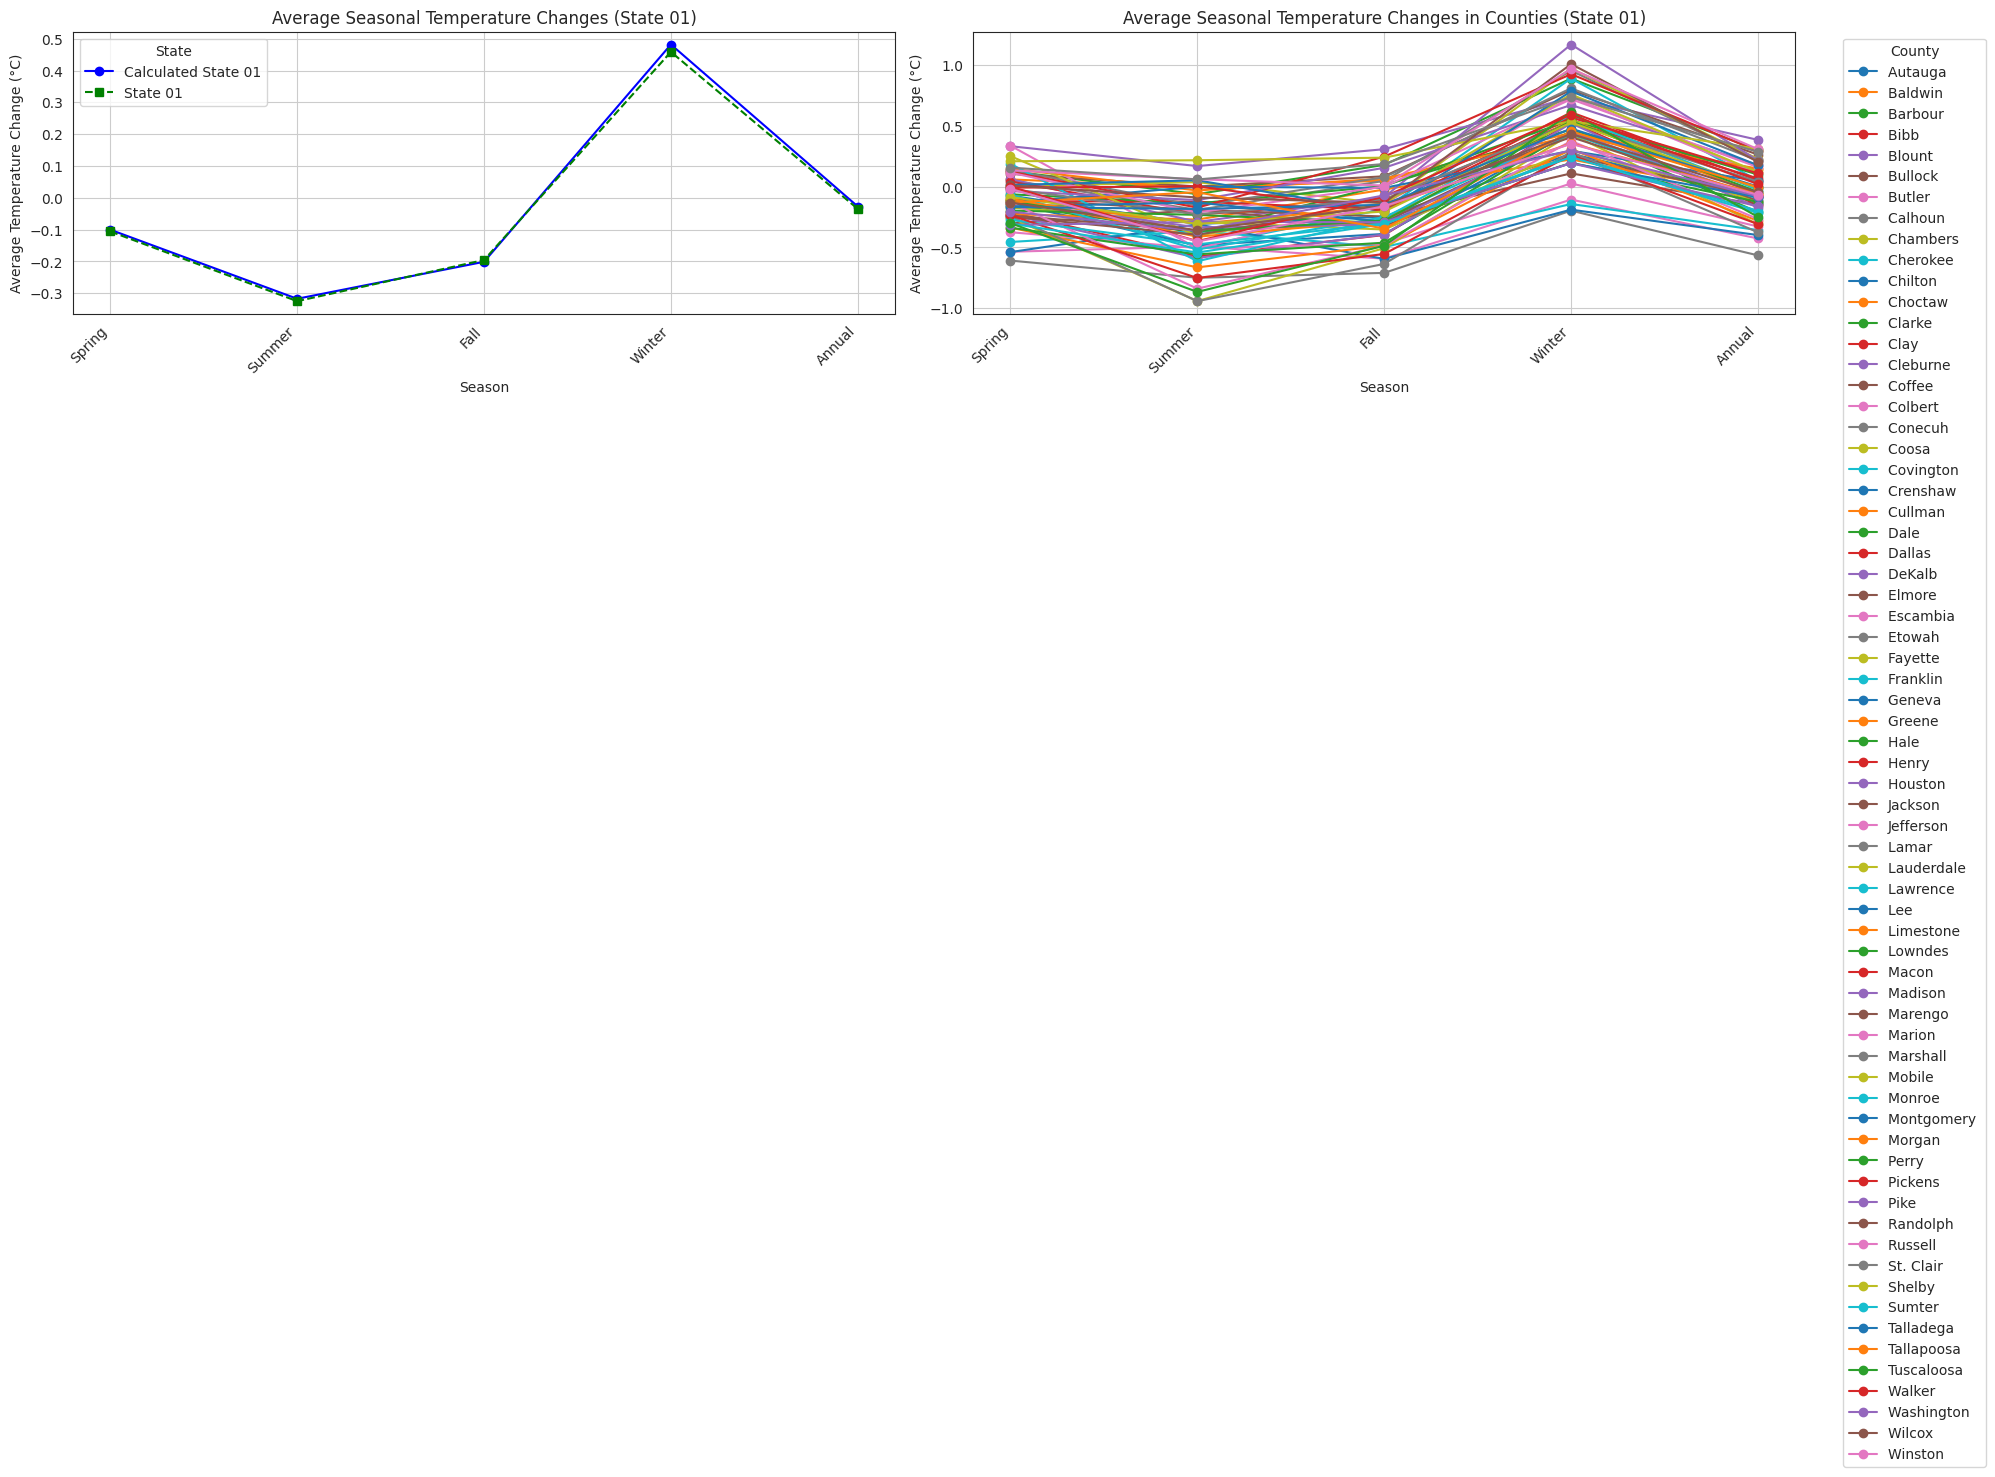

In [28]:
# State to analyze
state = '01'

# Filter data for the selected state
state_data = data_model_county[data_model_county['fips_02'] == state]
state_averages = data_model_state[data_model_state['fips'] == state][['Spring', 'Summer', 'Fall', 'Winter', 'Annual']]
# Calculate seasonal averages
seasons = ['Spring', 'Summer', 'Fall', 'Winter', 'Annual']
seasonal_data = state_data[seasons].mean(axis=0).reset_index(drop=True)

# Define colors and line styles
colors = ['blue', 'green']  # Customize colors (consider colorblind-friendly palettes)
linestyles = ['-', '--']

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# ---------- Subplot 1: Selected State Lines ----------

# Plot the calculated seasonal data
ax1.plot(seasons, seasonal_data.values, color='blue', label=f'Calculated State {state}', marker='o',
         linestyle='-', linewidth=1.5)

# Plot the state average data (assuming you have this data)
ax1.plot(seasons, state_averages[seasons].values[0], color='green', label=f'State {state}', marker='s',
         linestyle='--', linewidth=1.5)

# Set labels and title for Subplot 1
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Temperature Change (°C)')
ax1.set_title(f'Average Seasonal Temperature Changes (State {state})')

# Set x-ticks and labels explicitly
ax1.set_xticks(range(len(seasons)))
ax1.set_xticklabels(seasons, rotation=45, ha='right')
ax1.grid(True)

# Add legend to Subplot 1
ax1.legend(title='State', loc='upper left')

# ---------- Subplot 2: County Averages Lines ----------

county_codes = state_data['fips'].unique()

county_dataframes = []

for code in county_codes:
    county_data = state_data[state_data['fips'] == code]
    county_dataframes.append(county_data[['Spring', 'Summer', 'Fall', 'Winter', 'Annual']].mean(axis=0).reset_index(drop=True))

county_dataframes = pd.DataFrame(county_dataframes, index=county_codes)

county_names = state_data.set_index('fips')['CTYNAME'].to_dict()

for code, row in county_dataframes.iterrows():
    ax2.plot(seasons, row.values, marker='o', linestyle='-', linewidth=1.5, label=county_names[code])

# Set labels and title for Subplot 2
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Temperature Change (°C)')
ax2.set_title(f'Average Seasonal Temperature Changes in Counties (State {state})')
ax2.set_xticks(range(len(seasons)))
ax2.set_xticklabels(seasons, rotation=45, ha='right')
ax2.grid(True)

# Customize the legend
ax2.legend(title='County', loc='upper left', bbox_to_anchor=(1.05, 1.0))

# Adjust layout (optional)
plt.tight_layout()
plt.show()